### Material for reference

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea

In [3]:
import pandas as pd
df = pd.read_csv('banco.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,DOI (se houver),title,author,year,abstract
0,doi.org/10.1016/j.jsames.2020.102631,New palynostratigraphic data of the Irati (Ass...,"['HV Rocha', 'M Mendes', 'Z Pereira', 'C Rodri...",2020,This research presents the palynostratigraphy ...
1,doi.org/10.1016/j.cogsc.2020.100386,Hydrogenation of carbon dioxide: from waste to...,"['AH Braga', 'P Vidinha', 'LM Rossi']",2020,Atmospheric carbon dioxide concentration has b...
2,doi.org/10.1016/j.atmosenv.2020.117814,PM emissions from heavy-duty trucks and their ...,"['ACR Teixeira', 'RR Borges', 'PG Machado']",2020,The Brazilian transport system is based on the...
3,doi.org/10.1016/j.tranpol.2020.08.023,Public policies to implement alternative fuels...,"['ACR Teixeira', 'PG Machado', 'RR Borges', 'D...",2020,"Over the last century, several public policies..."
4,doi.org/10.1016/j.rser.2020.110296,Sugarcane for bioethanol production: Potential...,"['J Huang', 'MT Khan', 'D Perecin', 'ST Coelho']",2020,"Being a massive grower of sugarcane, China cou..."


In [4]:
df['full'] = df['title'] + ' ' + df['abstract'] #joining title and abstract

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [6]:
# define the stop words
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:20]

['already',
 'itself',
 'everything',
 'nine',
 'nothing',
 'because',
 'go',
 'at',
 'her',
 'make',
 'meanwhile',
 'somehow',
 'their',
 '’m',
 'if',
 'in',
 'least',
 'third',
 'before',
 'us']

In [7]:
# add some custom stop words
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]
for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [8]:
df['word_count'] = df['full'].apply(lambda x: len(str(x).split(" ")))
df.head()

,DOI (se houver),title,author,year,abstract,full,word_count
0,doi.org/10.1016/j.jsames.2020.102631,New palynostratigraphic data of the Irati (Ass...,"['HV Rocha', 'M Mendes', 'Z Pereira', 'C Rodri...",2020,This research presents the palynostratigraphy ...,New palynostratigraphic data of the Irati (Ass...,99
1,doi.org/10.1016/j.cogsc.2020.100386,Hydrogenation of carbon dioxide: from waste to...,"['AH Braga', 'P Vidinha', 'LM Rossi']",2020,Atmospheric carbon dioxide concentration has b...,Hydrogenation of carbon dioxide: from waste to...,92
2,doi.org/10.1016/j.atmosenv.2020.117814,PM emissions from heavy-duty trucks and their ...,"['ACR Teixeira', 'RR Borges', 'PG Machado']",2020,The Brazilian transport system is based on the...,PM emissions from heavy-duty trucks and their ...,98
3,doi.org/10.1016/j.tranpol.2020.08.023,Public policies to implement alternative fuels...,"['ACR Teixeira', 'PG Machado', 'RR Borges', 'D...",2020,"Over the last century, several public policies...",Public policies to implement alternative fuels...,99
4,doi.org/10.1016/j.rser.2020.110296,Sugarcane for bioethanol production: Potential...,"['J Huang', 'MT Khan', 'D Perecin', 'ST Coelho']",2020,"Being a massive grower of sugarcane, China cou...",Sugarcane for bioethanol production: Potential...,84


In [9]:
# calculate the frequency of each word
freq = pd.Series(' '.join(df['full']).split()).value_counts()[:20]
freq

the     175
of      161
and     111
to       81
a        70
in       63
for      51
The      40
on       34
2        30
as       28
is       28
with     25
this     24
by       23
that     21
This     18
CO       17
were     16
an       16
dtype: int64

In [10]:
freq1 =  pd.Series(' '.join(df
         ['full']).split()).value_counts()[-20:]
freq1

An                    1
describes             1
intended              1
…                     1
investigate           1
electrochemical       1
matter,               1
warming,              1
description           1
reaction,             1
ever-increasing       1
automated             1
(NaBH4)               1
equation.             1
palynostratigraphy    1
Ni/CeZrO              1
ISSUE                 1
years.                1
Southeastern          1
sector,               1
dtype: int64

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/sara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'iv',
 'just',
 'large',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'our',
 'ours',


In [13]:
# loop to remove all characters that are not necessary
nltk.download('wordnet')
corpus = []
for i in range(0, 40):
    #Remove punctuations
    #text = re.sub('[^a-zA-Z]', ' ', df['abstract'][i])
    
    #Convert to lowercase
    #text = text.lower()
    text = df['full'][i].lower()
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

[nltk_data] Downloading package wordnet to /home/sara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
corpus[3]

'public policy implement alternative fuel road transport sector last century, several public policy program focusing transport sector implemented, contributing change way fuel consumed world. paper aim analyze effect public policy fuel price consumption review legislation historical analysis 1920 2019 political economic context regarding different fuels. order so, paper us brazil case study. combining historical fuel prices/consumption data'

In [32]:
df['full'][3]

'Public policies to implement alternative fuels in the road transport sector Over the last century, several public policies and programs focusing on the transport sector have been implemented, contributing to changes in the way fuels are consumed in the world. This paper aims to analyze the effects of public policies on fuel prices and consumption through a review of the legislation and a historical analysis from 1920 to 2019 of the political and economic contexts regarding different fuels. In order to do so, this paper uses Brazil as a case study. From combining historical fuel prices/consumption data and the'

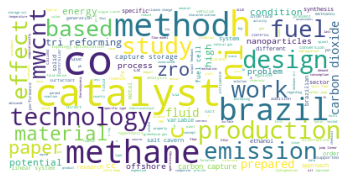

In [33]:
# example of word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=180,
                          max_font_size=50, 
                          random_state=544).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
#start vectorizing the texts
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [35]:
list(cv.vocabulary_.keys())[:20]

['palynostratigraphic',
 'data',
 'irati',
 'assistência',
 'member',
 'corumbataí',
 'formations',
 'paraná',
 'basin',
 'brazil',
 'correlation',
 'south',
 'american',
 'research',
 'present',
 'palynostratigraphy',
 'organic',
 'rich',
 'shale',
 'pb']

[Text(0, 0, 'co'),
 Text(1, 0, 'carbon'),
 Text(2, 0, 'methane'),
 Text(3, 0, 'fuel'),
 Text(4, 0, 'catalyst'),
 Text(5, 0, 'gas'),
 Text(6, 0, 'method'),
 Text(7, 0, 'ni'),
 Text(8, 0, 'brazil'),
 Text(9, 0, 'system'),
 Text(10, 0, 'flow'),
 Text(11, 0, 'fluid'),
 Text(12, 0, 'technology'),
 Text(13, 0, 'production'),
 Text(14, 0, 'design'),
 Text(15, 0, 'salt'),
 Text(16, 0, 'study'),
 Text(17, 0, 'specific'),
 Text(18, 0, 'emission'),
 Text(19, 0, 'mwcnt')]

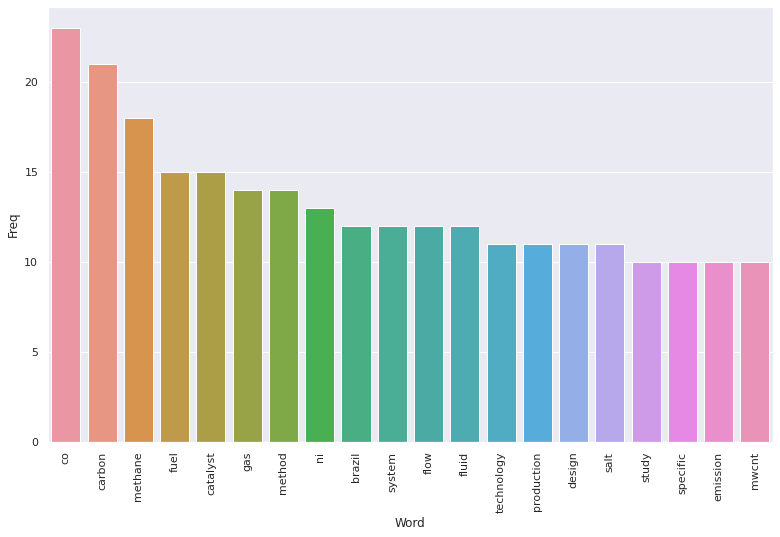

In [38]:
# get top words based on frequency
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'carbon dioxide'),
 Text(1, 0, 'tri reforming'),
 Text(2, 0, 'carbon capture'),
 Text(3, 0, 'capture storage'),
 Text(4, 0, 'fuel cell'),
 Text(5, 0, 'linear system'),
 Text(6, 0, 'topology optimization'),
 Text(7, 0, 'greenhouse gas'),
 Text(8, 0, 'natural gas'),
 Text(9, 0, 'salt cavern'),
 Text(10, 0, 'methane tri'),
 Text(11, 0, 'swirl flow'),
 Text(12, 0, 'gas emission'),
 Text(13, 0, 'ultra deep'),
 Text(14, 0, 'storage ccs'),
 Text(15, 0, 'fluid flow'),
 Text(16, 0, 'specific type'),
 Text(17, 0, 'flow model'),
 Text(18, 0, 'markov jump'),
 Text(19, 0, 'jump linear')]

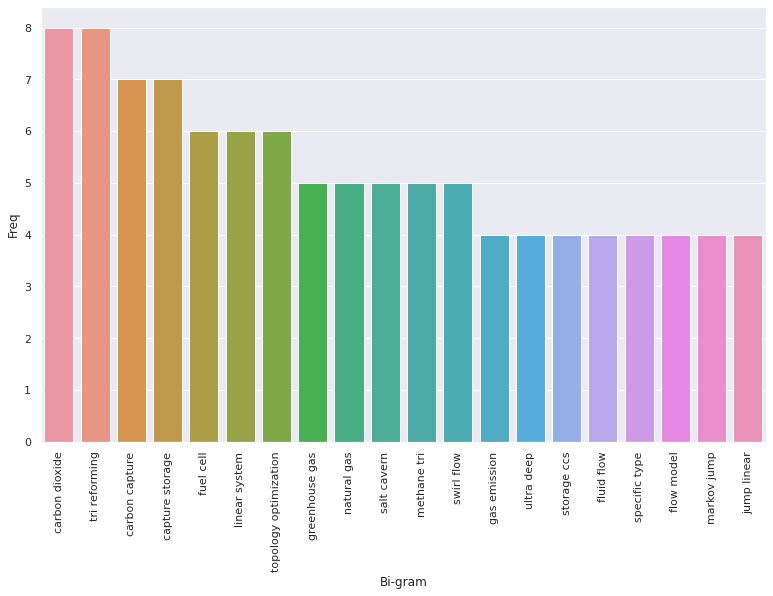

In [39]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

[Text(0, 0, 'carbon capture storage'),
 Text(1, 0, 'methane tri reforming'),
 Text(2, 0, 'greenhouse gas emission'),
 Text(3, 0, 'capture storage ccs'),
 Text(4, 0, 'markov jump linear'),
 Text(5, 0, 'jump linear system'),
 Text(6, 0, 'tri reforming methane'),
 Text(7, 0, 'ni mwcnt ce'),
 Text(8, 0, 'mwcnt ce catalyst'),
 Text(9, 0, 'exchange membrane fuel'),
 Text(10, 0, 'membrane fuel cell'),
 Text(11, 0, 'ultra deep water'),
 Text(12, 0, '2d swirl flow'),
 Text(13, 0, 'topology optimization method'),
 Text(14, 0, 'static output feedback'),
 Text(15, 0, 'corumbataí formations paraná'),
 Text(16, 0, 'formations paraná basin'),
 Text(17, 0, 'heavy duty truck'),
 Text(18, 0, 'liquefied natural gas'),
 Text(19, 0, 'brazil case study')]

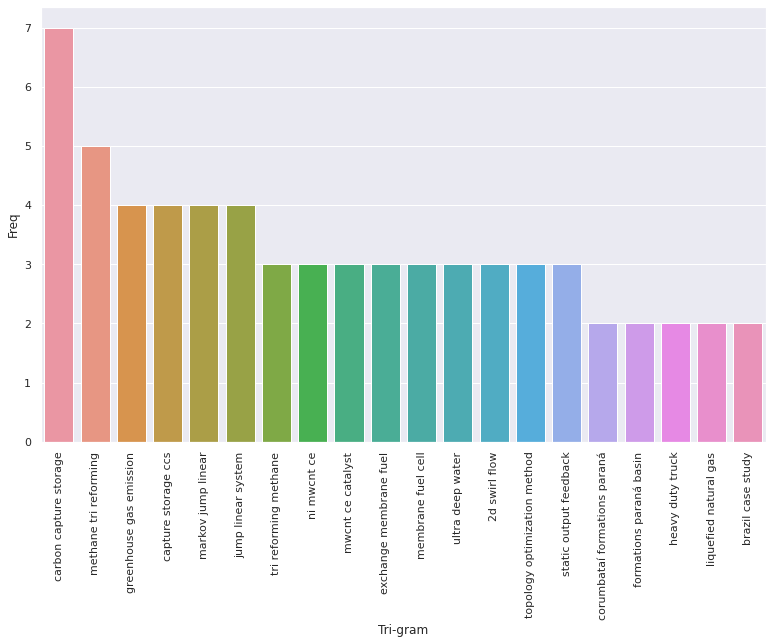

In [486]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

In [487]:
#Now I've used TfidfTransformer to define a score for each word
for i in range(0,39):
    num = i
    from sklearn.feature_extraction.text import TfidfTransformer
 
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)# get feature names
    feature_names=cv.get_feature_names()
 
    # fetch document for which keywords needs to be extracted
    doc=corpus[num]
 
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
    def extract_topn_from_vector(feature_names, sorted_items, topn=20):
        """get the feature names and tf-idf score of top n items"""
    
        #use only topn items from vector
        sorted_items = sorted_items[:topn]
 
        score_vals = []
        feature_vals = []
    
        # word index and corresponding tf-idf score
        for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
        results= {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]]=score_vals[idx]
    
        return results#sort the tf-idf vectors by descending order of scores

    sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10

    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
 
# now print the results
#print("\nAbstract:")
#print(doc)
#print("\nKeywords:")
    l = []
    for k in keywords:
        l.append(k)
    #print(k,keywords[k])
    df2['keywords'][num] = l

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarn

In [488]:
df2.head()

,DOI (se houver),title,author,year,abstract,word_count,keywords
0,doi.org/10.1016/j.jsames.2020.102631,New palynostratigraphic data of the Irati (Ass...,"['HV Rocha', 'M Mendes', 'Z Pereira', 'C Rodri...",2020,This research presents the palynostratigraphy ...,77,"[pb, paraná, irati, corumbataí, basin, paraná ..."
1,doi.org/10.1016/j.cogsc.2020.100386,Hydrogenation of carbon dioxide: from waste to...,"['AH Braga', 'P Vidinha', 'LM Rossi']",2020,Atmospheric carbon dioxide concentration has b...,84,"[co, value, increasing, conversion, dioxide, c..."
2,doi.org/10.1016/j.atmosenv.2020.117814,PM emissions from heavy-duty trucks and their ...,"['ACR Teixeira', 'RR Borges', 'PG Machado']",2020,The Brazilian transport system is based on the...,87,"[heavy duty, heavy, duty, truck, highway, heav..."
3,doi.org/10.1016/j.tranpol.2020.08.023,Public policies to implement alternative fuels...,"['ACR Teixeira', 'PG Machado', 'RR Borges', 'D...",2020,"Over the last century, several public policies...",88,"[public policy, public, policy, fuel, transpor..."
4,doi.org/10.1016/j.rser.2020.110296,Sugarcane for bioethanol production: Potential...,"['J Huang', 'MT Khan', 'D Perecin', 'ST Coelho']",2020,"Being a massive grower of sugarcane, China cou...",74,"[sugarcane, production, generation ethanol pro..."


In [ ]:
#Bellow you can find the keywords for each SGD

In [489]:
SDG1 = 'Africa Basic services Class Developing countries Disadvantaged Economic resources End poverty Environment Equality Extreme poverty Financial inclusion Income Income equality Microfinance Non-discrimination Poor Poor and vulnerable Poverty Poverty eradication Poverty line Quality of Life Resources Social protection systems / social protection Sustainable Third World Vulnerable Wealth distribution'

In [490]:
SDG2 = 'Agricultural Orientation index Agricultural productivity Agriculture Consume Crop diversity Crops Doha Development Round / Doha Round End hunger Environment Food Food gap Food production Food reserves ood Security Genetic diversity Genetic diversity of seeds Genetics Hunger Hungry people Improved nutrition Innovations and health Legumes Maize Malnourished Malnutrition Nutrition Nutritional needs Nutritious Poverty Produce Productivity Quality of life Resilient agriculture Rural infrastructure Small-scale food producers Stunted growth Stunting Sufficient food Sustainable Sustainable agriculture Sustainable food production Trade diversity Trade restrictions Under nourished / Undernourished Wasting World’s hungry'

In [491]:
SDG3 = 'Affordable medicines AIDS Air contamination Air pollution Alcohol abuse Antenatal care Antiretroviral Antiretroviral therapy Biomedical Bodily autonomy Child deaths Contraceptive use Death rate Dental Disability and family support Disability and inclusion Disability and politics of location Diseases Family planning Health Health in resource-constrained settings Health worker density Healthy Healthy lives Hepatitis HIV Improving mortality Increasing life expectancy Indigenous Infected International health policy International health regulations Malaria Maternal mortality Measles Medical Mental health Mortality Mortality rate Narcotic drug abuse Neonatal mortality Polio Premature mortality Preventable deaths Reducing malaria Reducing mortality Refugees and health services Reproductive health Road traffic accidents Sexual and reproductive health-care Sexual health Soil contamination Soil pollution Tobacco control Treatment of substance abuse Tuberculosis Universal health Universal health coverage Vaccines Vaccines in developing countries Violence WASH Water, Sanitation and Hygiene for All Water-borne disease wellbeing/well being/well-being World Health Organisation'

In [492]:
SDG4 = 'Access to education Basic education Basic literacy Basic literacy skills Cultural diversity Disability Disability and education Early childhood Early childhood development Education Education for sustainability Education in developing Enrolment Equal access Equal education Equitable education Gender disparities in education Gender disparity Gender equality Gender equity Gender sensitive Global citizenship Global education Inclusion and education Inclusive Innovation International cooperation Learning opportunities Lifelong learning Literacy Literacy skills Numeracy Preprimary education Primary education Qualified teachers Refugees and learning Scholarships School School enrolment Secondary education Teacher training Universal education Vocational training Vulnerable Women rights'

In [493]:
SDG5 = 'Basic living standards Dignity Disadvantaged Discrimination Employment Empower girls Empowerment Empowerment of women / empower women / women empowerment Equal access Equal opportunities Equality Exploitation Female genital mutilation Feminism Forced marriage Gender Gender discrimination Gender equality/parity Governance and gender Human rights Human trafficking Humanitarian Marginalised Parity Basic living standards Dignity Disadvantaged Discrimination Employment Empower girls Empowerment Empowerment of women / empower women / womens empowerment Equal access Equal opportunities Equality Exploitation Female genital mutilation Feminism Forced marriage Gender Gender discrimination Gender equality/parity Governance and gender Human rights Human trafficking Humanitarian Marginalised Parity Pay Reproductive rights Sexual and reproductive health Sexual exploitation Sexual violence Social inclusion Trafficking Universal health coverage Violence Violence against girls Violence against women Women Women in work Womens rights Workplace equality'

In [494]:
SDG6 = 'Accessible water Affordable drinking water Aquifer Cities Clean water Contaminated Defecation Desalination Diarrhoeal diseases Drought Dumping Ecosystem protection Ecosystem restoration Equitable sanitation Floods Fresh water Hydropower Hygiene Improving water Inadequate water Inadequate water supply Infrastructure Irrigation Lakes Affordable drinking water Aquifer Cities Clean water Contaminated Defecation Desalination Diarrhoeal diseases Drought Dumping Ecosystem protection Ecosystem restoration Equitable sanitation Floods Fresh water Hydropower Hygiene Improving water Inadequate water Inadequate water supply Infrastructure Irrigation Lakes Latrines Open defecation Pollution Recycled water Reuse River basins Rivers Safe drinking water Sanitation Sanitation and hygiene Sanitation management Sewerage Sustainable water management Sustainable withdrawals Third world Toilets Untreated wastewater Urban Waste Wastewater Wastewater treatment Water Water access Water disasters Water ecosystems Water efficiency Water harvesting Water quality Water resources management Water scarcity Water supply Water-related ecosystems Water-use efficiency'

In [495]:
SDG7 = 'Affordable energy Alternative energy Animal waste Battery Carbon Charcoal Clean energy Clean energy technology Clean fuel technology Clean fuels Cleaner fossil fuel technology Climate goal Coal Electricity Electricity infrastructure Emissions Energy Energy efficiency Energy infrastructure Energy research Energy technology Fossil-fuel Green economy Greenhouse gas Affordable energy Alternative energy Animal waste Battery Carbon Charcoal Clean energy Clean energy technology Clean fuel technology Clean fuels Cleaner fossil fuel technology Climate goal Coal Electricity Electricity infrastructure Emissions Energy Energy efficiency Energy infrastructure Energy research Energy technology Fossil-fuel Green economy Greenhouse gas Greenhouse gas emissions Hydroelectric Low carbon Modern electricity Modern energy Reliable energy Renewable Renewable energy Renewable power Solar Solar energy Solar power Sustainable energy Sustainable energy services Sustainable power Vehicles Wave Wind Wind power Wind turbine Wood'

In [496]:
SDG8 = 'Aid for trade Banking Child labour Child soldiers Creativity and innovation Culture Decent work Decent work for all Development oriented policy Economic growth Economic productivity Economy Enterprises Entrepreneurship Equal pay Finance Financial services Forced labour GDP growth Global resource efficiency Global trade Gross domestic product growth Human trafficking Banking Child labour Child soldiers Creativity and innovation Culture Decent work Decent work for all Development oriented policy Economic growth Economic productivity Economy Enterprises Entrepreneurship Equal pay Finance Financial services Forced labour GDP growth Global resource efficiency Global trade Gross domestic product growth Human trafficking Inclusive economic growth Innovation Insurance Job creation Jobs Labour market Labour rights Micro finance Migrant workers Modern slavery Poverty eradication Poverty line Productive employment Productivity Public policy Quality jobs Quality of life Resource efficiency Safe work Secure work Slavery Social policies Society Stable employment Stable jobs Sustainable consumption Sustainable economic growth Sustainable production Sustainable tourism Trade Unemployment Well-paid jobs Women migrants Work Work opportunities World trade Youth employment Youth unemployment'

In [497]:
SDG9 = 'Access to the internet Affordable access Affordable credit Clean technologies Cooperation Data banks Economic development Electrical power Energy Enterprises Environmentally sound technologies Financial services ICT infrastructure Industrial diversification Industrialisation Information and communication technology Infrastructure Innovation Internet access Irrigation Knowledge in education for all Mobile networks in developing countries Affordable access Affordable credit Clean technologies Cooperation Data banks Economic development Electrical power Energy Enterprises Environmentally sound technologies Financial services ICT infrastructure Industrial diversification Industrialisation Information and communication technology Infrastructure Innovation Internet access Irrigation Knowledge in education for all Mobile networks in developing countries National Security Network infrastructure Phone service Public policy Quality of life Regional infrastructure Research Resilient infrastructure Resource use efficiency Roads Sanitation Scientific research Society Sustainable industrialisation Sustainable infrastructure Technological capabilities Technology Trade Transborder infrastructure Transport Value chains Value chains and markets Water infrastructure Water resources'

In [498]:
SDG10 = 'Affordable housing Age Ageism Business Children Culture Developing countries Developing states Development assistance Disabilities Discrimination Discriminatory Economy Education Empower Equal opportunity Income inequality Indigenous Inequalities Inequality Migrant remittance Migration Population growth Poverty Public policy Quality of life Race Racisim Reduce inequalities Religion Rural Sex Sexism Social protection Society Vulnerable nations World trade'

In [499]:
SDG11 = 'Adaptable Adaptation Affordable housing Air pollution Air quality Cities Climate change Community Cultural heritage Decentralisation Development planning Disaster management Disaster risk reduction Disaster Strategy Disasters Natural disasters Natural heritage Over crowding Pollution Population Population growth Public spaces Public transport Resilient Resilient buildings Resource efficiency Resource needs Risk reduction strategy Road safety Safe cities Shanty Slums Smart cities Solid waste Suburban Sustainable Sustainable building/s Sustainable cities/city Sustainable communities Sustainable urbanisation Town planning Transport Transport systems Urban Urban development Urban planning Urban sustainability Urbanisation Waste Waste generation Waste management Water Water-related disasters'

In [500]:
SDG12 = 'Capitalism Cars Circular economy Commercial enterprises Consumer levels Consumerism Consumption Efficient use of resources Energy Energy consumption Energy efficiency Energy use Food Food losses Food supply Food waste Fossil fuel subsidies Future proof Global food waste Greenhouse gasses Harvest losses Life cycle Market distortions Materialism Materials goods Monitoring sustainable development Natural resources Obsolescence Overconsumption Production Recycle Recycling Reduce waste generation Reduction Renewable Resource efficiency Responsible production chains Retail Retail industry Reuse Sustainable Sustainable consumption Sustainable management Sustainable practices Sustainable production Sustainable public procurement Sustainable resource use Sustainable supply chain Sustainable tourism Vehicles Waste Wasteful consumption Water Water pollution Water supply'

In [501]:
SDG13 = 'Average global temperature Carbon Carbon dioxide Changing weather patterns Climate Climate action Climate and politics Climate change Climate change management Climate change planning Climate change policy Climate early warning Climate hazards Climate impact Climate mitigation Climate refugees Climate related hazards Climate resilience CO 2 carbon dioxide CO2 capture CO2 conversion COP 21 COP 22 Ecosystems Emissions Extreme weather Extreme weather events Global mean temperature Global temperature Global warming Greenhouse gas Greenhouse gas emissions Greenhouse gases Ice loss Low-carbon economy Natural disasters Natural systems Ocean warming Paris Agreement Pollution Renewable Sea level rise / Rising sea / Rising sea level Temperature Warming'

In [502]:
SDG14 = 'Artisanal fishers Biodiversity Carbon dioxide Coastal biodiversity Coastal ecosystems Coastal habitats Coastal parks Coastal resources Coastlines Conserve Conserve oceans Coral bleaching Coral reef Ecosystem management Fish species Fish stocks Fish stocks AND FISHERIES MANAGEMENT Fisheries Fishers Fishing Fishing practices Global warming Illegal fishing Kelp Law of the Sea Marine Marine Parks Marine pollution Marine resources Ocean Ocean acidification Ocean temperature Oceanography Oceans Overfishing Productive oceans Protected areas Sea grasses Seas Sustainable ecosystems Unregulated fishing Water resources and policy'

In [503]:
SDG15 = 'Afforestation Agriculture Animals Arable land Bees Biodiversity Biodiversity loss Conservation Deforestation Desertification Drought Drylands Ecosystem Ecosystem restoration Ecosystems Extinct Extinct species Extinction Forest Forest management Forests Genetic resources Illegal wildlife products Illicit trafficking Afforestation Agriculture Animals Arable land Bees Biodiversity Biodiversity loss Conservation Deforestation Desertification Drought Drylands Ecosystem Ecosystem restoration Ecosystems Extinct Extinct species Extinction Forest Forest management Forests Genetic resources Illegal wildlife products Illicit trafficking Indigenou Indigenous population Invasive alien species Land use and sustainability Manage forests Managed forests Micro-organisms Permaculture Plants Poaching Poverty Protected fauna Protected flora Protected species Reforestation Soil Soil degradation Species Strategic plan for biodiversity Terrestrial ecosystems Threatened species Tree Tree species Wetlands'

In [504]:
SDG16 = 'Abuse Accountability Accountable institutions Arbitrary detention Arms Arms trafficking Birth registration Bribery Combat terrorism Conflict resolution Conflicts Corruption Discrimination Education Enforced disappearance Equal access Equity Exploitation Flow of arms Freedom Geography of poverty Governance Hate crime Human rightsInstitutions Internally displaced Judiciary Justice Justice for all Legal identity National Security Non-violence Organized crime Paris principles Peace Peaceful societies Physical abuse Police Prevent violence Psychological abuse Public policy Quality of life Representative decision-making Rule of law Security threats Sexual abuse Sexual violence Stolen assets Tax evasion Theft Torture Trafficking Transparency Un-sentenced detainees Unstable societies Victims of violence Violence Violence against women and children Violence rates Weapon seizures'

In [505]:
SDG17 = 'Capacity building Civil society partnerships Communication technologies Debt sustainability Development assistance Disaggregated data Doha Development Agenda Entrepreneurship Environmentally sound technologies Foreign direct investments Fostering innovation Free trade Fundamental principles of official statistics Global partnership Global partnership for sustainable development Global stability International aid International cooperation International population and housing census International support International support for developing countries Knowledge sharing Multi-stakeholder partnerships Poverty eradication Public-private partnerships Science cooperation agreements Technology cooperation agreements Technology transfer Weighted tariff average Women entrepreneurs World Trade Organization'

In [523]:
# same thing is done with these keywords
    text = SDG17.lower()
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text_17= " ".join(text)
    text_17

'capacity building civil society partnership communication technology debt sustainability development assistance disaggregated data doha development agenda entrepreneurship environmentally sound technology foreign direct investment fostering innovation free trade fundamental principle official statistic global partnership global partnership sustainable development global stability international aid international cooperation international population housing census international support international support developing country knowledge sharing multi-stakeholder partnership poverty eradication public-private partnership science cooperation agreement technology cooperation agreement technology transfer weighted tariff average woman entrepreneur world trade organization'

In [592]:
ks = []
for i in range(0,40):
    vec1 = corpus[i]
    vec2 = text_1
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer()
    vecs = tfidf.fit_transform([vec1, vec2])
    corr_matrix = ((vecs * vecs.T).A)
    #df['SDG1'] = corr_matrix[0,1]
    s.append(corr_matrix[0,1])

In [593]:
df2['SDG1'] = s

In [594]:
df2.head()

,DOI (se houver),title,author,year,abstract,word_count,keywords,SDG17,SDG16,SDG15,...,SDG10,SDG9,SDG8,SDG7,SDG6,SDG5,SDG4,SDG3,SDG2,SDG1
0,doi.org/10.1016/j.jsames.2020.102631,New palynostratigraphic data of the Irati (Ass...,"['HV Rocha', 'M Mendes', 'Z Pereira', 'C Rodri...",2020,This research presents the palynostratigraphy ...,77,"[pb, paraná, irati, corumbataí, basin, paraná ...",0.007948,0.000000,0.000000,...,0.006108,0.015423,0.000000,0.003135,0.004669,0.000000,0.000000,0.000000,0.000000,0.000000
1,doi.org/10.1016/j.cogsc.2020.100386,Hydrogenation of carbon dioxide: from waste to...,"['AH Braga', 'P Vidinha', 'LM Rossi']",2020,Atmospheric carbon dioxide concentration has b...,84,"[co, value, increasing, conversion, dioxide, c...",0.019086,0.000000,0.000000,...,0.007254,0.018389,0.012946,0.113263,0.001814,0.005468,0.009261,0.005947,0.000000,0.000000
2,doi.org/10.1016/j.atmosenv.2020.117814,PM emissions from heavy-duty trucks and their ...,"['ACR Teixeira', 'RR Borges', 'PG Machado']",2020,The Brazilian transport system is based on the...,87,"[heavy duty, heavy, duty, truck, highway, heav...",0.022808,0.004193,0.003002,...,0.013807,0.045526,0.004849,0.049153,0.001715,0.015690,0.000000,0.054104,0.004242,0.012507
3,doi.org/10.1016/j.tranpol.2020.08.023,Public policies to implement alternative fuels...,"['ACR Teixeira', 'PG Machado', 'RR Borges', 'D...",2020,"Over the last century, several public policies...",88,"[public policy, public, policy, fuel, transpor...",0.021957,0.025404,0.000000,...,0.048918,0.038383,0.061256,0.061157,0.001648,0.000000,0.000000,0.013767,0.004077,0.012016
4,doi.org/10.1016/j.rser.2020.110296,Sugarcane for bioethanol production: Potential...,"['J Huang', 'MT Khan', 'D Perecin', 'ST Coelho']",2020,"Being a massive grower of sugarcane, China cou...",74,"[sugarcane, production, generation ethanol pro...",0.003946,0.003735,0.002674,...,0.012291,0.010220,0.018067,0.000000,0.001527,0.000000,0.000000,0.007482,0.047981,0.005536


In [595]:
df2.to_csv('SDGs.csv')

In [1]:
import pandas as pd
df = pd.read_csv('SDGs.csv')